NAMA    : Ananda Rafi Amanullah
<p> NIM     : 1102213017</p>
<p>KELAS   : EL-44-G4 [EL-45-07]</p>

# Regresi Softmax [WEEK 4]

In [54]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [55]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10,random_state=42)
softmax_reg.fit(X, y)



LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [56]:
#clasifikasi
softmax_reg.predict([[5, 2]])
print(softmax_reg.predict([[5, 2]]))

[2]


In [57]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])

In [58]:
x0, x1 = np.meshgrid(
np.linspace(0, 8, 500).reshape(-1, 1),
np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
print(x0)

[[0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 ...
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]
 [0.         0.01603206 0.03206413 ... 7.96793587 7.98396794 8.        ]]


In [59]:
print(x1)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01758794 0.01758794 0.01758794 ... 0.01758794 0.01758794 0.01758794]
 [0.03517588 0.03517588 0.03517588 ... 0.03517588 0.03517588 0.03517588]
 ...
 [3.46482412 3.46482412 3.46482412 ... 3.46482412 3.46482412 3.46482412]
 [3.48241206 3.48241206 3.48241206 ... 3.48241206 3.48241206 3.48241206]
 [3.5        3.5        3.5        ... 3.5        3.5        3.5       ]]


In [60]:
print(X_new)

[[0.         0.        ]
 [0.01603206 0.        ]
 [0.03206413 0.        ]
 ...
 [7.96793587 3.5       ]
 [7.98396794 3.5       ]
 [8.         3.5       ]]


In [61]:
y_proba = softmax_reg.predict_proba(X_new)
print(y_proba)

[[9.99996343e-01 3.65653912e-06 6.21264670e-20]
 [9.99996053e-01 3.94664573e-06 7.18141519e-20]
 [9.99995740e-01 4.25976904e-06 8.30124831e-20]
 ...
 [7.05525470e-23 9.94778520e-12 1.00000000e+00]
 [6.10350342e-23 9.28861452e-12 1.00000000e+00]
 [5.28014304e-23 8.67312251e-12 1.00000000e+00]]


In [62]:
y_predict = softmax_reg.predict(X_new)
print(y_predict)

[0 0 0 ... 2 2 2]


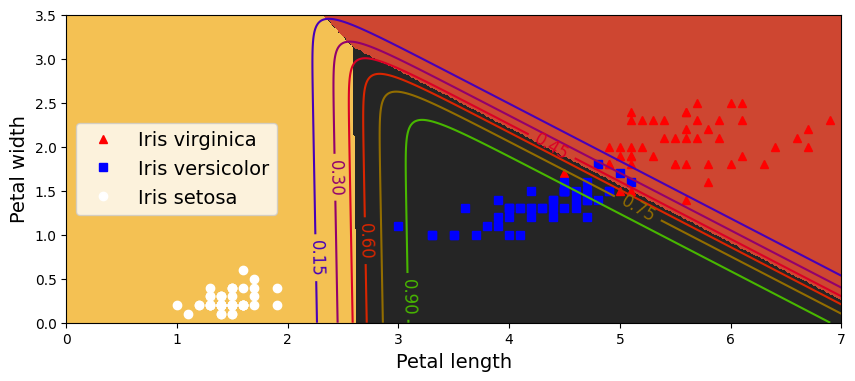

In [63]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "r^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "wo", label="Iris setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#f4c153','#252525','#ce4631'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

# Regresi Polinomial

<function matplotlib.pyplot.show(close=None, block=None)>

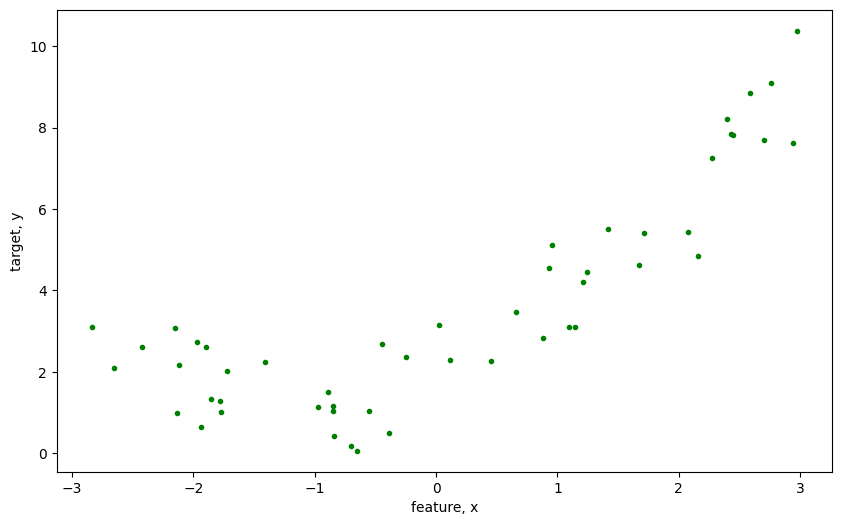

In [64]:
import numpy as np
import matplotlib.pyplot as plt
m = 50
X = 6*np.random.rand(m,1) - 3
y = 0.5*(X**2)+X+2+np.random.randn(m,1)
#plotting data
plt.figure(figsize=(10,6))
plt.plot(X,y,'g.')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.show

In [65]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-1.9683631])

In [66]:
X_poly[0]

array([-1.9683631 ,  3.87445329])

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_
#y_pred = 2.19 + 1.08 x^1 + 0.44 x^2


(array([1.9636265]), array([[1.08232372, 0.49070917]]))

<function matplotlib.pyplot.show(close=None, block=None)>

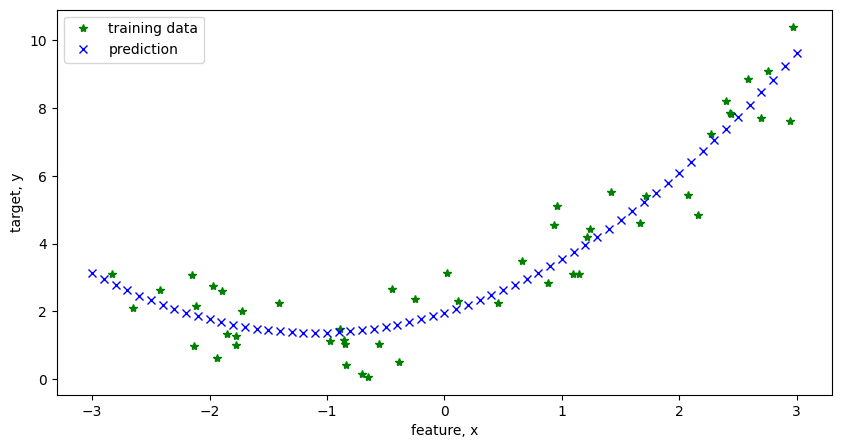

In [68]:
x_lin = np.arange(-3,3.1,0.1)
y_est = lin_reg.coef_[0,1]*(x_lin**2)+lin_reg.coef_[0,0]*x_lin+lin_reg.intercept_
#plotting data
plt.figure(figsize=(10,5))
plt.plot(X,y,'g*',label='training data')
plt.plot(x_lin,y_est,'bx',label='prediction')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.legend(loc='upper left')
plt.show

In [69]:
print(x_lin)

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00]


# Regresi Logistik

In [70]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [71]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
import numpy 

X = iris['data'][:,3:] #lebar petal
y = (iris['target']==2).astype(numpy.int_) # 1 jika iris virginica dan yang lain 0

In [73]:
print(X)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [75]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_predic = log_reg.predict(X_new[10].reshape(-1, 1))
print(y_predic)

[0]


In [76]:
dataTest = X_new[10].reshape(-1, 1)
print(dataTest)
y_predic = log_reg.predict(dataTest)
print(y_predic)

[[0.03003003]]
[0]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

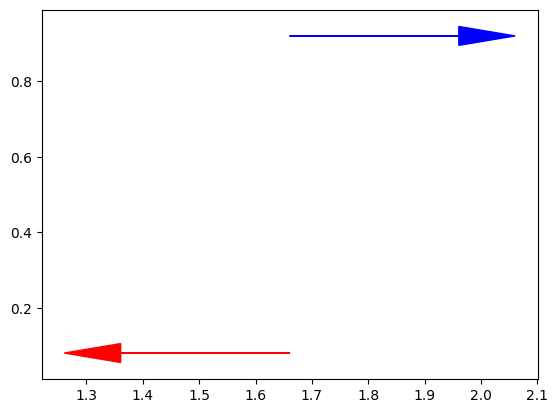

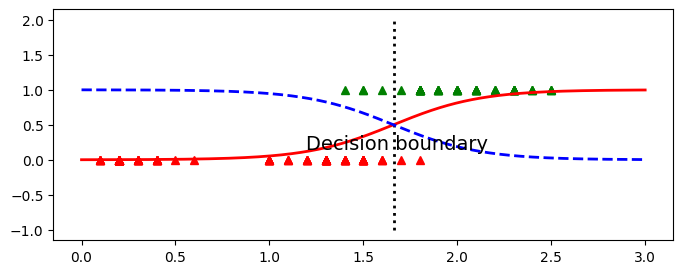

In [80]:
import numpy as np

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "r^")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "r-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary",fontsize=14,color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()


In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

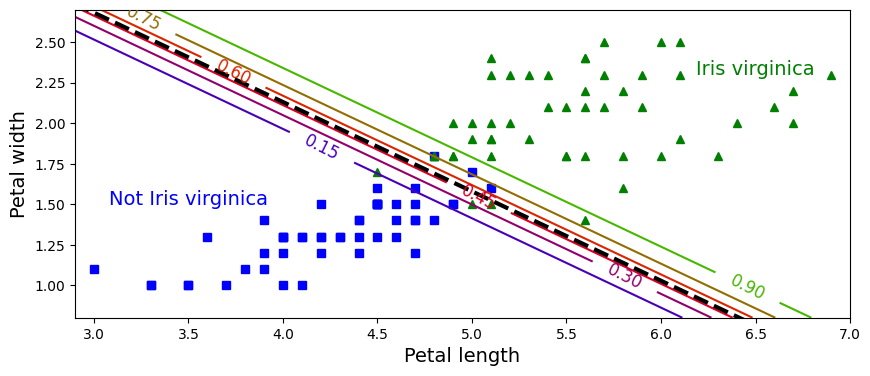

In [ ]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int_)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)
x0, x1 = np.meshgrid(
np.linspace(2.9, 7, 500).reshape(-1, 1),
np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0])/log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
print(y_proba)

[[9.99999998e-01 1.60015753e-09]
 [9.99999998e-01 1.67775966e-09]
 [9.99999998e-01 1.75912522e-09]
 ...
 [8.83590978e-11 1.00000000e+00]
 [8.42721448e-11 1.00000000e+00]
 [8.03741518e-11 1.00000000e+00]]


In [ ]:
log_reg.predict(X_new)


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)


# Regresi Linier SKLear

Text(0, 0.5, 'target, y')

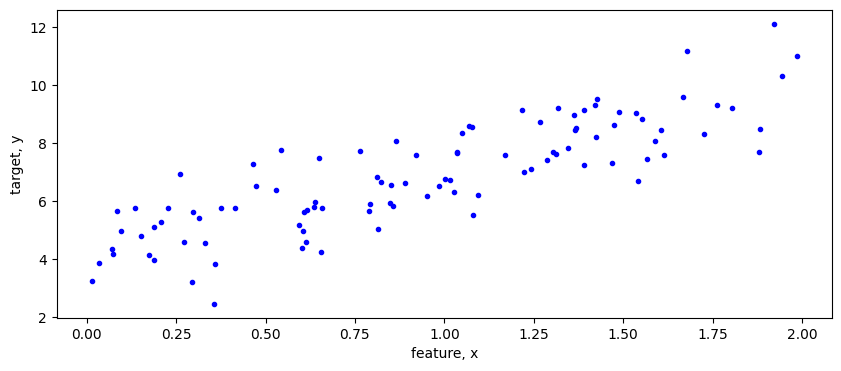

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)
plt.figure(figsize=(10,4))
plt.plot(x,y,"b.")
plt.xlabel('feature, x')
plt.ylabel('target, y')


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_
#y_pred = 3.7 + 3.31x

(array([4.12232357]), array([[2.93017349]]))

<function matplotlib.pyplot.show(close=None, block=None)>

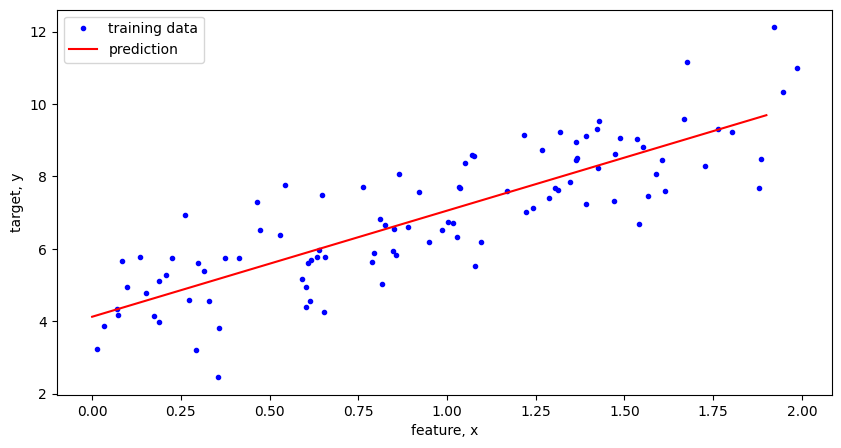

In [ ]:
x_lin = np.arange(0,2,0.1)
y_est = lin_reg.coef_[0]*(x_lin)+lin_reg.intercept_
#plotting data
plt.figure(figsize=(10,5))
plt.plot(x,y,'b.',label='training data')
plt.plot(x_lin,y_est,'r-',label='prediction')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.legend(loc='upper left')
plt.show

# AI PROGRAMMING EXAMPLE [WEEK 5]

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = iris.iloc[:,:4]

Text(0, 0.5, 'target, y')

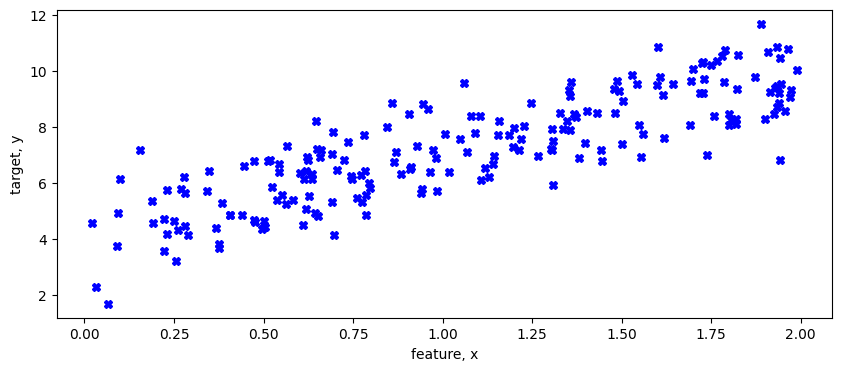

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(200,1)
y = 4+3*x+np.random.randn(200,1)
plt.figure(figsize=(10,4))
plt.plot(x,y,"bX")
plt.xlabel('feature, x')
plt.ylabel('target, y')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.intercept_, lin_reg.coef_
#y_pred = 3.7 + 3.31x

(array([4.27905438]), array([[2.78376916]]))

In [ ]:
y_Predict = lin_reg.predict(X_test )
from sklearn.metrics import r2_score
r2_score(y_Predict, y_test)

0.6479045573664938

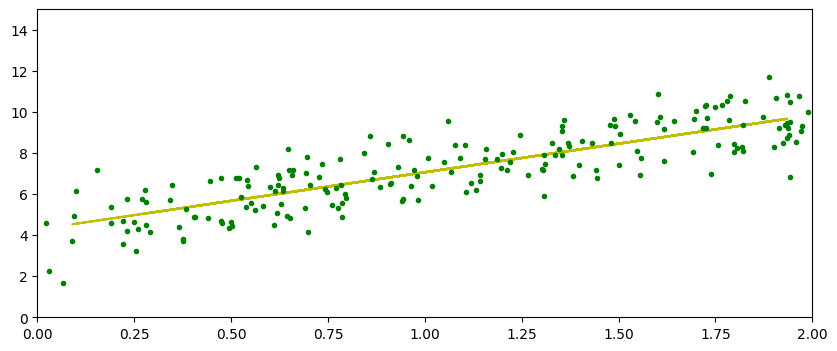

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(X_test, y_Predict, "y-")
plt.plot(x, y, "g.")
plt.axis([0, 2, 0, 15])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

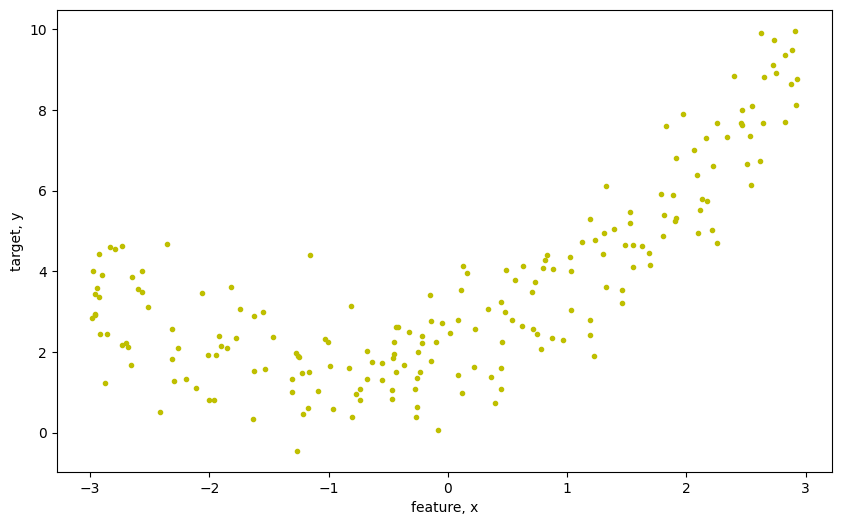

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
m = 200
X = 6*np.random.rand(m,1) - 3
y = 0.5*(X**2)+X+2+np.random.randn(m,1)
#plotting data
plt.figure(figsize=(10,6))
plt.plot(X,y,'y.')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.show

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(len(X_poly))

200


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2,random_state = 0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.intercept_, lin_reg.coef_
#y_pred = 3.7 + 3.31x

(array([2.26529444]),
 array([[ 1.29491342e+00, -2.51223901e-01, -2.81134170e-01,
          6.75079876e-01,  7.09179641e-02, -2.19397346e-01,
         -6.54322084e-03,  2.94604090e-02,  1.72468497e-04,
         -1.39840472e-03]]))

In [ ]:
len(X_test[:,0:1])

40

<function matplotlib.pyplot.show(close=None, block=None)>

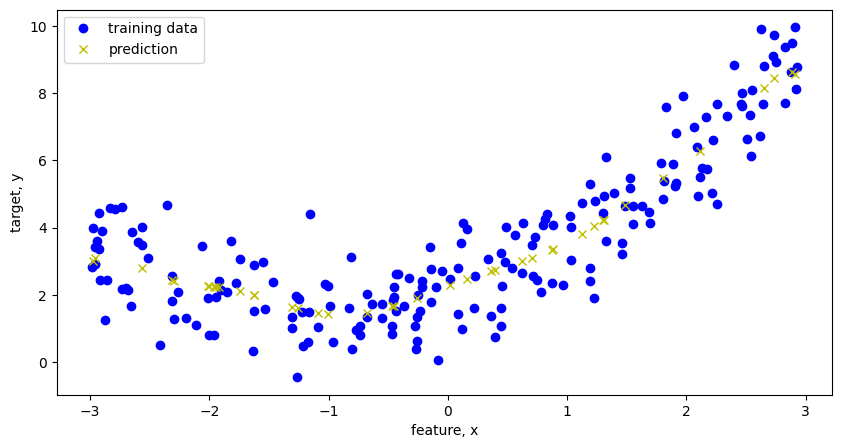

In [ ]:
y_Predict = lin_reg.predict(X_test )
#plotting data
plt.figure(figsize=(10,5))
plt.plot(X,y,'bo',label='training data')
plt.plot(X_test[:,0:1],y_Predict,'yx',label='prediction')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.legend(loc='upper left')
plt.show

In [ ]:
r2_score(y_Predict, y_test)


0.7792169874334856

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X = iris['data'][:,3:] #lebar petal
y = (iris['target']==2).astype(np.int_) # 1 jika iris virginica dan yang lain 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_Predict = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Predict)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_Predict)

array([[24,  0],
       [ 1,  5]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_Predict))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42,criterion='gini')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 109.5 kB/s eta 0:00:03
     ---- -------------------------------- 30.7/278.7 kB 109.5 kB/s eta 0:00:03
     ----- ------------------------------- 41.0/278.7 kB 115.5 kB/s eta 0:00:03
     -------- ---------------------------- 61.4/278.7 kB 164.1 kB/s eta 0:00:02
     --------- --------------------------- 71.7/278.7 kB 171.1 kB/s eta 0:00:02
     -------------- --------------------- 112.6/278.7 kB 242.7 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/278.7 kB 275.0 kB/s eta 0

In [ ]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# Assuming iris is your dataset
dot_data = export_graphviz(tree_clf,
                           out_file=None,
                           feature_names=['feature_name'],
                           class_names=iris.target_names,
                           rounded=True,
                           filled=True)

# Specify the path to Graphviz executable
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_4.png', prog='dot')


InvocationException: Program terminated with status: 1. stderr follows: Format: "png" not recognized. Use one of:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your dataset X and corresponding labels y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you've already trained your decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Now you can predict using the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have your dataset X and corresponding labels y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you've already trained your decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Now you can predict using the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 1.0
Confusion Matrix:
[[19  0]
 [ 0 11]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming you have your dataset X and corresponding labels y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you've already trained your decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Now you can predict using the test set
y_pred = tree_clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



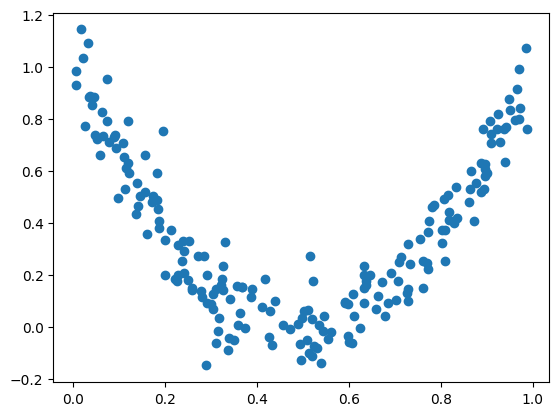

In [ ]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Assuming you have your dataset X and corresponding labels y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Now you can predict using the test set
y_pred = tree_reg.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.9667675682713277


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [ ]:
y_Predict = svm_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Predict)


1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_Predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_Predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



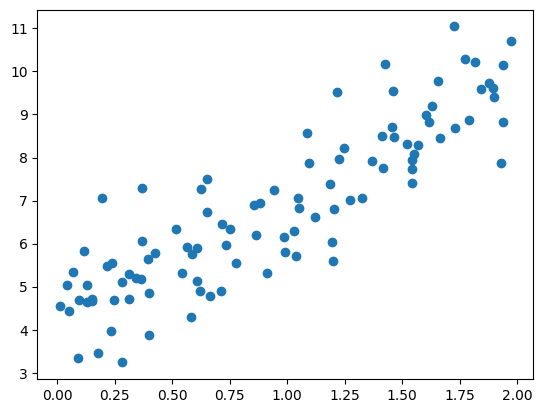

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=0.5, random_state=42)
svm_reg.fit(X_train, y_train)


C:\Users\Ananda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=0.5, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already defined and trained your SVM regressor (svm_reg)
# and have your test data X_test and corresponding true labels y_test

# Predict using the SVM regressor
y_pred = svm_reg.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: -0.2363742346294655


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_Predict = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Predict)


1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_Predict)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_Predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



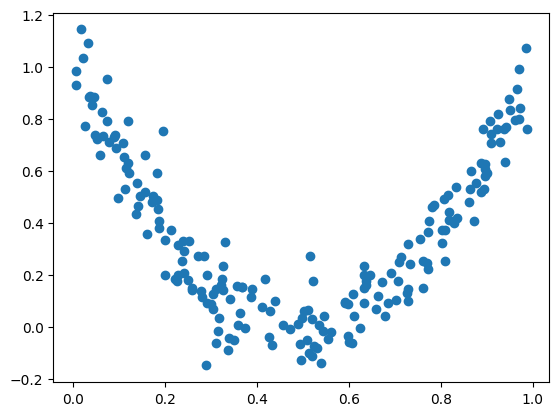

In [ ]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
import matplotlib.pyplot as plt
plt.scatter(X,y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already defined and trained your KNN model (knn_model)
# and have your test data X_test and corresponding true labels y_test

# Predict using the KNN model
y_pred = knn_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.7916666666666667


In [ ]:
from sklearn import datasets
## library dataset sklearn ini yang digunakan.
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [ ]:
from sklearn.model_selection import train_test_split
#train_test_split function dari sklean yang digunakan untuk spliting dataset.
#spliting 20% untuk data testing 80% data training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

##Import library Perceptron
from sklearn.linear_model import Perceptron
#Define variable model perceptron
percepModel = Perceptron()
#Training dilakukan dengan menggunakan data training
percepModel.fit(X_train, y_train)

Perceptron()

In [ ]:
y_Predict = percepModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Predict)

0.9473684210526315

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_Predict)

array([[41,  2],
       [ 4, 67]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_Predict))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

